### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 1
### Due: By class time on Jan 16th
---

## Problem 1

Practice your git and GitHub skills by submitting this homework via GitHub.  You can skip Steps 1-4 if you have already completed the in-class work of Lecture 1.  Steps 5-11 are the new steps.  

1) Navigate to https://github.com/VanderbiltAstronomy/astr_8070_s24 on your browser. **Don't clone this!** Instead, look to the rop right of the page for an option to fork the repository. Do this now. This will make a copy of the class repository for your own personal use.

2) Now that you have a fork of the repository, clone it to your machine.

    $ git clone https://github.com/YOUR_USERNAME/astr_8070_s24

3) Add the original `VanderbiltAstronomy` repository as an `upstream` repository to your fork. First, list the current configured remote repository for your fork with:

    $ git remote -v
    
Now, add the `VanderbiltAstronomy` repo as an upstream:

    $ git remote add upstream https://github.com/VanderbiltAstronomy/astr_8070_s24
    
Verify that the new repository shows as an `upstream` by running `git remote -v` again.

4) Get used to syncing upstream content to your fork with:

    $ git fetch upstream
    
    $ git checkout main
    
    $ git merge upstream/main

5) Now, navigate to `coursework/student_folders` folder. Make a folder in here labeled by your name in all lowercase(i.e. `firstname_lastname`).

6) Copy your completed lecture notebooks (with all exercises in red finished) to your folder, adding your name to the file (e.g. `Lecture_1b_FirstnameLastname.ipynb`). This is what you will do for each week's lecture notebooks to get participation credit. Your lecture notebooks should have already been copies of my base lecture notebooks. **Never** run my base notebooks; always make a personal copy for yourself.

7) Copy the **Homework 1** notebook (this file) to your folder, adding your name (e.g. `vu_astr8070_s24_hw1_FirstnameLastname.ipynb`) 

8) Complete the other problems listed below.

9) Submit your homework as follows (making sure that your added files are contained within your student folder):

    $ git add vu_astr8070_s24_hw1_FirstnameLastname.ipynb
    
    $ git commit -m "Uploaded Homework 1"
    
    $ git push
   
10) Similarly add, commit, and push your completed lecture notebooks. 

11) On your browser, navigate on GitHub to your fork of the course repository. You should see an option to initiate a `pull request` to merge your changes into the `main` repository. Your homework and lecture notebooks for the week are submitted when you initiate this pull request.

## Problem 2



Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

1) *(To get you started)* If the first child is male, then the only unknown is the sex of the second child. We want the second child to be female, which has a probability of 0.5. Thus, $p(F,M |C_1=M) = 0.5$. 

2) We know that one child is female, though we don't know whether it is the first or the second. (In the end, this doesn't matter.) If the first child is female, then we have odds of 0.5 that the second is also female, so the odds are 0.5. $p(F,F |C_1=F) = 0.5$. If the second child is female, then the probability that the first child is also female is again 0.5. This works because the sexes of the two children are independent events. $p(F,F |C_2=F) = 0.5$. 

<span style="color:red">The key here is that there are 3 possible ways of having at least one child female: FF, MF, FM. Of these, FF is one option. Therefore the prob is 1/3. Treat conditionals as fixed data. -3 points.</span>


3) Here we know that the first/oldest child is female, so we have $p(F,F |C_1=F) = 0.5$. The sexes of the two children are independent events, and there are equal odds of a male or female child, so we have a probability of 0.5. 

## Problem 3

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the base-10 log of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `Lecture_2`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.

### Solution

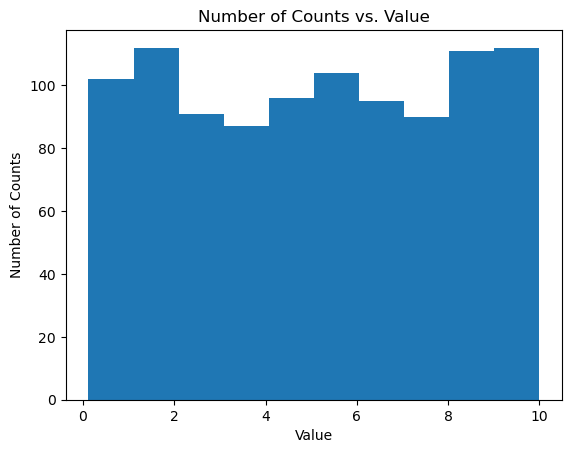

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x=np.random.uniform(0.1,10,1000)
plt.hist(x)
plt.xlabel("Value")
plt.ylabel("Number of Counts")
plt.title("Number of Counts vs. Value")
plt.show() 


$p(y) = \left|\frac{dx}{dy}\right| p(x)$

$\frac{dx}{dy} = x \log(10)$

$p(x)=\frac{1}{10-0.1}$

Thus before normalization, $p(y)=\frac{\left| x \log(10) \right|}{9.9}$. 

<span style="color:red">This is some red text.No, this is already normalized! You got it correct above.</span>

This needs to be normalized so the integral is 1. 

$\int_{0.1}^{10} \frac{\left| x \log(10) \right|}{9.9} dx = \frac{49.995 \log(10)}{9.9}$ thus

$p(y)=\frac{\left| x \right|}{49.995} = \frac{\left| 10^y \right|}{49.995}$

<span style="color:red">This is some red text.Yes, it must be normalized to integrate over 1. But you are normalizing the pdf of y, so the integral should be over y. You'll find that your pdf was already correctly normalized by the transformation, which is the point. -3 points.</span>

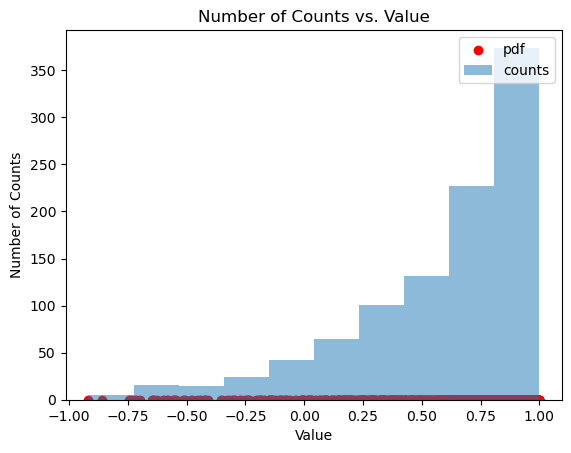

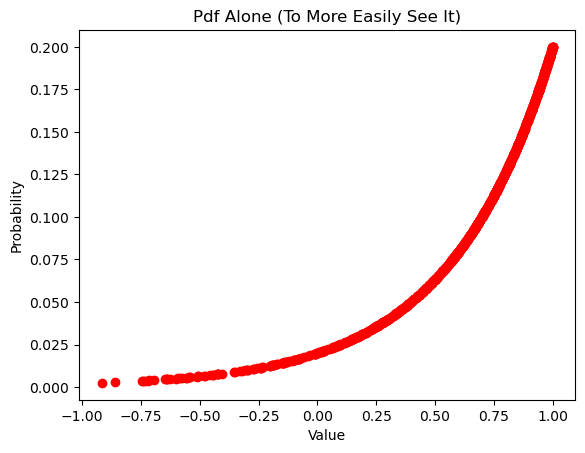

In [3]:
import math
y=np.log10(x)
ypdf=[]
xaxisvals=[]
for element in x:
    ypdf.append(math.fabs(element/49.995))
    xaxisvals.append(np.log10(element))
plt.scatter(xaxisvals,ypdf, color='r', label='pdf')
plt.hist(y,alpha=0.5, label='counts')
plt.legend(loc='upper right')
plt.xlabel("Value")
plt.ylabel("Number of Counts")
plt.title("Number of Counts vs. Value")
plt.show() 

plt.clf()
plt.scatter(xaxisvals,ypdf, color='r')
plt.xlabel("Value")
plt.ylabel("Probability")
plt.title("Pdf Alone (To More Easily See It)")
plt.show()


<span style="color:red">Recommend you learn about vectorizing calculations with numpy on arrays. The for loop above is unnecessary.</span>

In [4]:
Mean_x=np.mean(x)
Mean_y=np.mean(y)
Median_x=np.median(x)
Median_y=np.median(y)
print("Mean of x: ")
print(Mean_x)
print("Median of x: ")
print(Median_x)
print(" ")
print("Mean of y: ")
print(Mean_y)
print("Median of y: ")
print(Median_y)

print("Mean and median of y, where I transform it back to show comparison to values for x: ")
print("Transformed mean: ")
print(10**Mean_y)
print("Transformed median: ")
print(10**Median_y)

Mean of x: 
5.1260981955871765
Median of x: 
5.207308161379926
 
Mean of y: 
0.5903198153738227
Median of y: 
0.7166127664092726
Mean and median of y, where I transform it back to show comparison to values for x: 
Transformed mean: 
3.893317441739936
Transformed median: 
5.207302010605277


The untransformed medians here are not the same, so it is possible that I made a mistake. I don't see the mistake yet, though. I do find (after transforming back) that the medians for x and y are the same, but the means are different. This checks out. 


<span style="color:red">Correct! The rank of samples dont change in the transformation.</span>